# Time Series Visualization

Dataset: Minimum Daily Temperatures Dataset
This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

## Line Plot

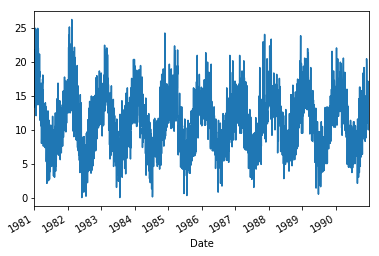

In [1]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
series.plot()
pyplot.show()

* It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.
* The Minimum Daily Temperatures dataset spans 10 years.
* We can group data by year and create a line plot for each year for direct comparison.


## Stacked Line Plots

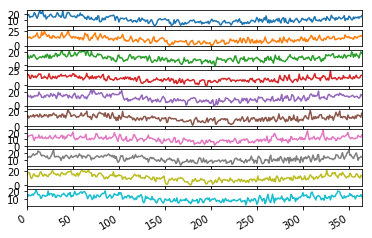

In [2]:
# create stacked line plots
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

## Histogram and Density Plots

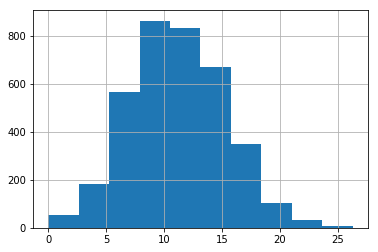

In [3]:
# create a histogram plot
series.hist()
pyplot.show()

We can get a better idea of the shape of the distribution of observations by using a density plot.

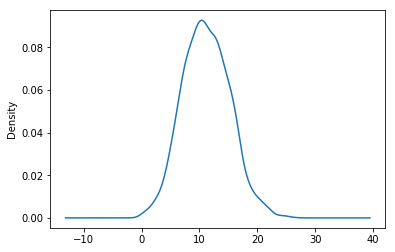

In [4]:
# create a density plot
series.plot(kind='kde')
pyplot.show()

We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian. Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform.

## Box and Whisker Plots by Interval


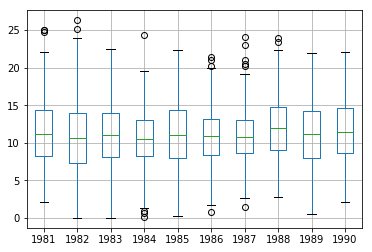

In [5]:
# create a boxplot of yearly data
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

## Box and Whisker Plots - monthly data

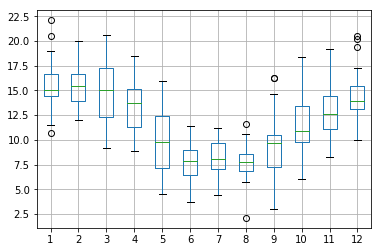

In [7]:
# create a boxplot of monthly data
from pandas import concat
one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

## Heat Maps

In the case of the Minimum Daily Temperatures, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. 

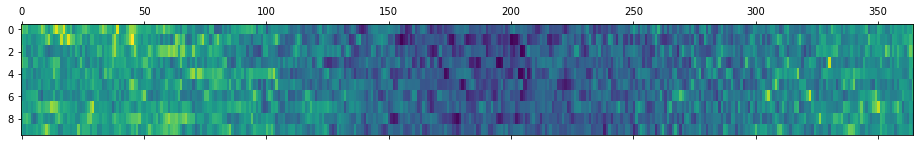

In [8]:
# create a heat map of yearly data
from pandas import TimeGrouper
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

The plot shows the cooler minimum temperatures in the middle days of the years and the warmer minimum temperatures in the start and ends of the years, and all the fading and complexity in between.


As with the box and whisker plot example above, we can also compare the months within a year

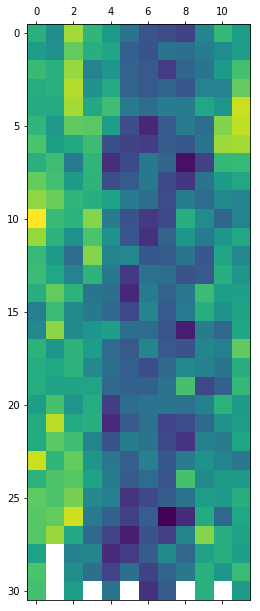

In [9]:
# create a heat map of monthly data
one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

Running the example shows the same macro trend seen for each year on the zoomed level of month-to-month. We can also see some white patches at the bottom of the plot. This is missing data for those months that have fewer than 31 days, with February being quite an outlier with 28 days in 1990.

## Lag Scatter Plots


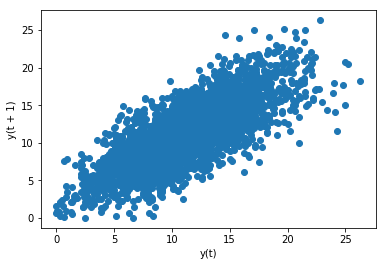

In [11]:
from pandas.plotting import lag_plot
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
lag_plot(series)
pyplot.show()

* More points tighter in to the diagonal line suggests a stronger relationship.
* More spread from the line suggests a weaker relationship.
* A ball in the middle or a spread across the plot suggests a weak or no relationship.

The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.

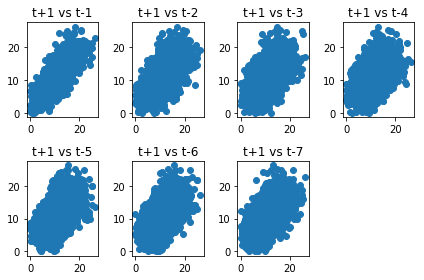

In [13]:
# create multiple scatter plots for each value in the previous seven days.
from pandas.tools.plotting import scatter_matrix
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.tight_layout()
pyplot.show()

Running the example suggests the strongest relationship between an observation with its lag=1 value, but generally a good positive correlation with each value in the last week.


## Autocorrelation Plots


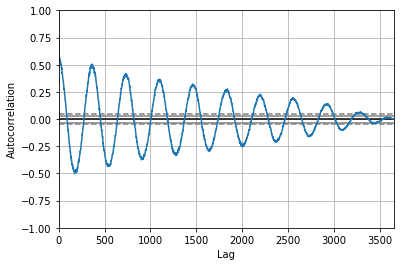

In [15]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

* The resulting plot shows lag along the x-axis and the correlation on the y-axis.
* Dotted lines are provided that indicate any correlation values above those lines are statistically signiﬁcant (meaningful).
* We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation.
* This captures the relationship of an observation with past observations in the same and opposite seasons or times of year.
* Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

# Use and Remove Trends
Dataset: Shampoo Sales Dataset. This dataset describes the monthly number of sales of shampoo over a 3 year period.

### Detrend by Diﬀerencing

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

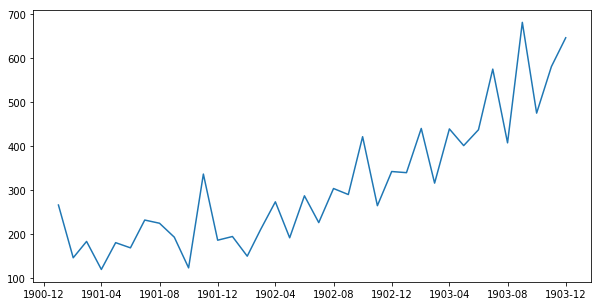

In [19]:
# visualize the original series
pyplot.figure(figsize=(10, 5))
pyplot.plot(series)
pyplot.show()

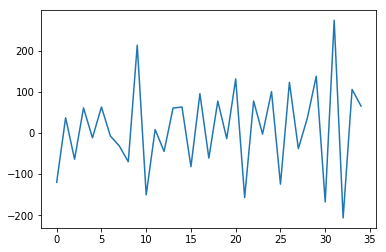

In [17]:
# detrend a time series using differencing
X = series.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

Because no diﬀerence value can be created for the ﬁrst observation (there is nothing for it to be subtracted from), the new dataset contains one less record. We can see that indeed the trend does appear to have been removed.

This approach works well for data with a linear trend. If the trend is quadratic (the change in the trend also increases or decreases), then a diﬀerence of the already-diﬀerenced dataset can be taken, a second level of diﬀerencing. 

### Detrend by Model Fitting

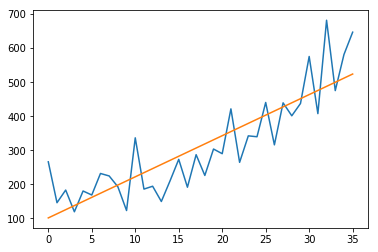

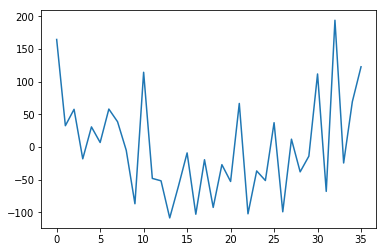

In [20]:
# use a linear model to detrend a time series

from sklearn.linear_model import LinearRegression
import numpy

# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()

# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]

# plot detrended
pyplot.plot(detrended)
pyplot.show()

# Use and Remove Seasonality
Dataset:  Minimum Daily Temperatures. This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

## Seasonal Adjustment with Diﬀerencing

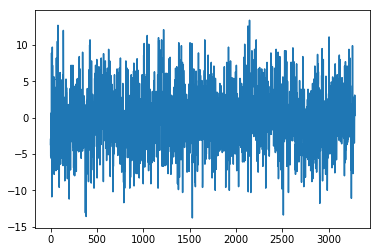

In [21]:
# deseasonalize a time series using differencing
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

We can subtract the daily minimum temperature from the same day last year to correct for seasonality. This would require special handling of February 29th in leap years and would mean that the ﬁrst year of data would not be available for modeling.

There are two leap years in our dataset (1984 and 1988). They are not explicitly handled; this means that observations in March 1984 onwards the oﬀset are wrong by one day, and after March 1988, the oﬀsets are wrong by two days. One option is to update the code example to be leap-day aware.

Another option is to consider that the temperature within any given period of the year is probably stable. Perhaps over a few weeks. We can shortcut this idea and consider all temperatures within a calendar month to be stable. An improved model may be to subtract the average temperature from the same calendar month in the previous year, rather than the same day. We can start oﬀ by resampling the dataset to a monthly average minimum temperature.

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
1981-06-30     7.306667
1981-07-31     7.577419
1981-08-31     7.238710
1981-09-30    10.143333
1981-10-31    10.087097
1981-11-30    11.890000
1981-12-31    13.680645
1982-01-31    16.567742
Freq: M, Name: Temp, dtype: float64


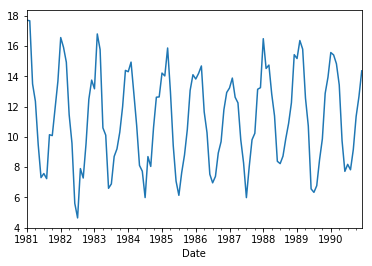

In [23]:
# calculate and plot monthly average
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13)) # prints the ﬁrst 13 months of average monthly minimum temperatures.
monthly_mean.plot() # plots the monthly data, clearly showing the seasonality of the dataset.
pyplot.show()

We can test the same diﬀerencing method on the monthly data and conﬁrm that the seasonally adjusted dataset does indeed remove the yearly cycles.

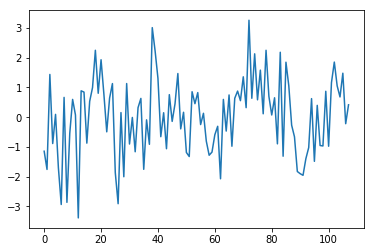

In [24]:
# deseasonalize monthly data by differencing
resample = series.resample('M')
monthly_mean = resample.mean()
X = series.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
	value = monthly_mean[i] - monthly_mean[i - months_in_year]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

Running the example creates a new seasonally adjusted monthly minimum temperature dataset, skipping the ﬁrst year of data in order to create the adjustment. The adjusted dataset is then plotted.


Next, we can use the monthly average minimum temperatures from the same month in the previous year to adjust the daily minimum temperature dataset. Again, we just skip the ﬁrst year of data, but the correction using the monthly rather than the daily data may be a more stable approach.

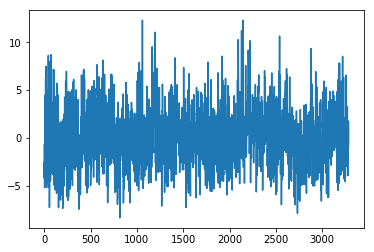

In [25]:
# deseasonalize a time series using month-based differencing
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
	month_mean_last_year = series[month_str].mean()
	value = X[i] - month_mean_last_year
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

Running the example again creates the seasonally adjusted dataset and plots the results. This example is robust to daily ﬂuctuations in the previous year and to oﬀset errors creeping in due to February 29 days in leap years.

## Seasonal Adjustment with Modeling 

Let’s start oﬀ by ﬁtting a curve to the Minimum Daily Temperatures dataset. The NumPy library provides the polyfit() function1 that can be used to ﬁt a polynomial of a chosen order to a dataset. First, we can create a dataset of time index (day in this case) to observation. We could take a single year of data or all the years. Ideally, we would try both and see which model resulted in a better ﬁt. We could also smooth the observations using a moving average centered on each value. This too may result in a model with a better ﬁt. 

Once the dataset is prepared, we can create the ﬁt by calling the polyfit() function passing the x-axis values (integer day of year), y-axis values (temperature observations), and the order of the polynomial. The order controls the number of terms, and in turn the complexity of the curve used to ﬁt the data. Ideally, we want the simplest curve that describes the seasonality of the dataset. For consistent sine wave-like seasonality, a 4th order or 5th order polynomial will be suﬃcient. In this case, I chose an order of 4 by trial and error. The resulting model takes the form: 

$$y\;=\;(x^{4}\times b_{1})+(x^{3}\times b_{2})+(x^{1}\times b_{4})+b_{5}$$

Where y is the ﬁt value, x is the time index (day of the year), and b1 to b5 are the coeﬃcients found by the curve-ﬁtting optimization algorithm. Once ﬁt, we will have a set of coeﬃcients that represent our model. We can then use this model to calculate the curve for one observation, one year of observations, or the entire dataset.

Coefficients: [ -1.17308000e-08   9.30253946e-06  -2.15977594e-03   1.19147966e-01
   1.38980178e+01]


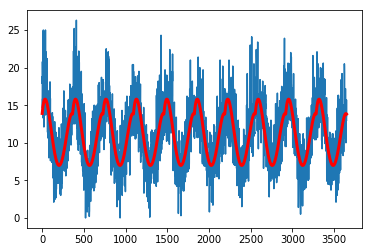

In [26]:
# model seasonality with a polynomial model

from numpy import polyfit

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)

# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

Running the example creates the dataset, ﬁts the curve, predicts the value for each day in the dataset, and then plots the resulting seasonal model over the top of the original dataset. One limitation of this model is that it does not take into account of leap days, adding small oﬀset noise that could easily be corrected with an update to the approach. For example, we could just remove the two February 29 observations from the dataset when creating the seasonal model.

The curve appears to be a good ﬁt for the seasonal structure in the dataset.  We can now use this model to create a seasonally adjusted version of the dataset.

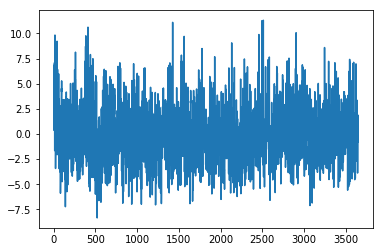

In [27]:
# deseasonalize by differencing with a polynomial model

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)

# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)

# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
	value = values[i] - curve[i]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()